# Creating Word Vectors with word2vec

###Load dependencies¶


In [0]:
# Install dependensies which are not present
!pip install -q gensim
!pip install -q bokeh

In [0]:
#NLTK
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg
#Gensim
import gensim
from gensim.models.word2vec import Word2Vec
#TSNE
from sklearn.manifold import TSNE #T-distributed Stochastic Neighbor Embedding (t-SNE)
#Pandas
import pandas as pd
#Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [3]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###Load data

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /content/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [0]:
from nltk.corpus import gutenberg

###Tokenize text

In [0]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

##Word2Vec

###Run Word2Vec

In [0]:
# quick tutorial
gensim.models.Word2Vec?

In [0]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [0]:
model.save('raw_gutenberg_model.w2v')

###Explore model

In [0]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [11]:
model['dog']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.16061199,  0.14410317,  0.6298458 , -0.24013872, -0.24755019,
        0.08265774, -0.15895727, -0.13990931, -0.23811689,  0.28862387,
        0.277856  ,  0.1058628 , -0.11640148, -0.56633884, -0.19426692,
        0.14433971, -0.49132   ,  0.05307864, -0.39112025, -0.34017628,
       -0.53911674,  0.10534193, -0.04375068,  0.4309104 , -0.42634246,
        0.15306227, -0.23655032, -0.20625295, -0.20591246,  0.30007142,
        0.4915949 ,  0.35255763, -0.50896007, -0.0826439 , -0.14596514,
       -0.03338693, -0.37387776,  0.26989964, -0.7075783 , -0.09798415,
       -0.2679988 , -0.12963356, -0.25159737,  0.2230067 , -0.35484853,
        0.29471624, -0.07905564,  0.06934111,  0.02716767,  0.3161218 ,
        0.26285133,  0.04697531, -0.0477135 ,  0.2563168 , -0.4954804 ,
       -0.08363678,  0.09082461,  0.04689747, -0.4667623 , -0.42191765,
       -0.1588838 , -0.02396063, -0.10698676, -0.0033182 ], dtype=float32)

In [12]:
len(model['dog'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [13]:
model.most_similar('dog') # distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8444405794143677),
 ('cage', 0.7801507711410522),
 ('sweeper', 0.776360809803009),
 ('shell', 0.7535595893859863),
 ('pet', 0.7497179508209229),
 ('thief', 0.7419955730438232),
 ('pig', 0.741401195526123),
 ('broth', 0.7406438589096069),
 ('Truck', 0.7381798624992371),
 ('chimney', 0.735548734664917)]

In [14]:
model.most_similar('think')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.8698181509971619),
 ('know', 0.8460766077041626),
 ('manage', 0.840580403804779),
 ('contradict', 0.8336050510406494),
 ('downright', 0.8298962712287903),
 ('_you_', 0.8172004222869873),
 ('NOW', 0.8062896728515625),
 ('beaux', 0.8050098419189453),
 ('Mamma', 0.8016949892044067),
 ('argue', 0.8013838529586792)]

In [15]:
model.most_similar('day')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.800197958946228),
 ('time', 0.7522628307342529),
 ('night', 0.7413136959075928),
 ('month', 0.7122348546981812),
 ('evening', 0.7091541886329651),
 ('Saturday', 0.6759315729141235),
 ('fourteenth', 0.6745097041130066),
 ('week', 0.6732573509216309),
 ('morrow', 0.6634639501571655),
 ('feasting', 0.6631506681442261)]

In [16]:
model.most_similar('father')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.8670369386672974),
 ('brother', 0.8465156555175781),
 ('sister', 0.7894768118858337),
 ('wife', 0.7808263301849365),
 ('Amnon', 0.7718353271484375),
 ('daughter', 0.76790452003479),
 ('bondwoman', 0.7563806772232056),
 ('son', 0.7184827327728271),
 ('brethren', 0.7163634896278381),
 ('concubine', 0.7148101329803467)]

In [17]:
model.doesnt_match("mother father daughter dog".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [18]:
model.similarity('father', 'dog')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.4725760740873848

In [19]:
# close, but not quite; distinctly in female direction: 
model.most_similar(positive=['father', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.7874205708503723),
 ('mother', 0.7839066386222839),
 ('wife', 0.7762141227722168),
 ('daughter', 0.763648271560669),
 ('husband', 0.7532643675804138),
 ('brother', 0.7306340336799622),
 ('Sarah', 0.7214615941047668),
 ('Sarai', 0.7015196681022644),
 ('daughters', 0.6945115923881531),
 ('conceived', 0.6845173239707947)]

In [0]:
# close, but not quite; distinctly in female direction: 
# model.most_similar(positive=['dog', 'mother'], negative=['puppy'])

In [21]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wife', 0.7474620342254639),
 ('Sarah', 0.7408691644668579),
 ('daughter', 0.7265720367431641),
 ('Hagar', 0.726521909236908),
 ('Bethuel', 0.7195677757263184),
 ('Abram', 0.7174839973449707),
 ('Nahor', 0.7154285311698914),
 ('Sarai', 0.715329110622406),
 ('Leah', 0.7152775526046753),
 ('conceived', 0.7019640207290649)]

In [22]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wife', 0.7386541366577148),
 ('sister', 0.7054669857025146),
 ('conceived', 0.6756779551506042),
 ('daughter', 0.6653238534927368),
 ('child', 0.6633215546607971),
 ('mother', 0.6577804088592529),
 ('widow', 0.6418254375457764),
 ('maid', 0.6293755769729614),
 ('nurse', 0.6262315511703491),
 ('adultery', 0.6133497953414917)]

In [23]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sarah', 0.7487640380859375),
 ('Rachel', 0.720556378364563),
 ('Abram', 0.7049258351325989),
 ('Leah', 0.6985483765602112),
 ('Sarai', 0.6923784613609314),
 ('Hagar', 0.6906241178512573),
 ('Laban', 0.6784263253211975),
 ('Bethuel', 0.6778740882873535),
 ('Solomon', 0.6757568120956421),
 ('Rebekah', 0.6718076467514038),
 ('Pharaoh', 0.6688215732574463),
 ('Judah', 0.6664667129516602),
 ('Padanaram', 0.6624921560287476),
 ('Esau', 0.6596304774284363),
 ('tribute', 0.6589567065238953),
 ('Bilhah', 0.6565463542938232),
 ('Lot', 0.6526512503623962),
 ('damsel', 0.651582658290863),
 ('David', 0.6482545137405396),
 ('Ephron', 0.648055374622345)]

###Reduce word vector dimensionality with t-SNE

In [24]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7fa460448390>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7fa46066ecc0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fa46066e668>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7fa46066e0b8>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7fa46066ec18>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7fa46066eef0>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7fa46066e198>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7fa46066ea20>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7fa46066e358>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7fa46066e550>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7fa46066eb38>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fa46066e978>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7fa46066e2b0>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fa46066e710>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fa46066ef98>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7fa4

In [25]:
len(model.wv.vocab)

17011

In [26]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [0]:
# takes 20 min to execute
#X_2d = tsne.fit_transform(X)

In [0]:
#X_2d[0:5]

In [0]:
# create DataFrame for storing results and plotting
#coords_df = pd.DataFrame(X_2d, columns=['x','y'])
#coords_df['token'] = model.wv.vocab.keys()

In [0]:
#coords_df.head()

In [0]:
# save for later use
#coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

In [0]:
# read, if not running the tsne.fit_transform(X) function
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [34]:
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

NameError: ignored

In [67]:
coords_df.head(20)

,x,y,token
0,55.214817,30.909588,[
1,35.943439,49.960533,Emma
2,40.075863,4.070810,by
3,40.328392,47.386326,Jane
4,55.162285,30.889513,]
5,-17.753267,36.436695,I
6,-62.427559,-38.452877,CHAPTER
7,40.214634,46.975811,Woodhouse
8,40.302780,5.259758,","
9,4.415280,42.710060,handsome


###Visualize 2D representation of word vectors



In [0]:
# subset words so that the code runs faster
subset_df = coords_df.sample(n=500)

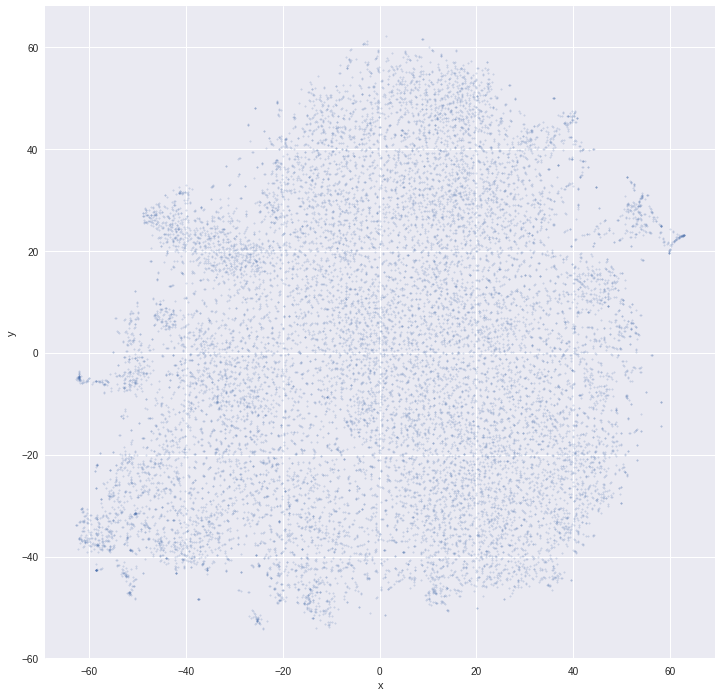

In [70]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

###Visualize interactive representation of word vectors

In [71]:
output_notebook() # output bokeh plots inline in notebook
p = figure()
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

Loading BokehJS ...